# <span style="color:blue">Nota Prèvia</span>


<p><span style="color:blue">
Si bé està clar que cal resoldre els exercicis indicats, la forma de fer-ho ha vingut determinada per la intenció que darrera de cada gràfic hi hagi un missatge, una conclusió manifestada visualment de l'anàlisi de les dades. Trobar aquesta "història" no sempre és una tasca senzilla, perquè a més pot aparèixer durant el propi treball, a mida que es va coneixent millor el dataframe.</span></p>
<span style="color:blue"><p>
L'advertiment té sentit perquè els diferents tipus de gràfics són adequats en situacions específiques. No necessàriament una imatge més estètica o espectacular aporta la informació de la millor manera.</p>
</span>


# Exercici 1

Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

    Una variable categòrica (UniqueCarrier)
    Una variable numèrica (ArrDelay)
    Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
    Dues variables numèriques (ArrDelay i DepDelay)
    Tres variables (ArrDelay, DepDelay i UniqueCarrier)
    Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier). 

In [124]:
# Importació de les llibreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [125]:
# Càrrega del DataSet
df_ini = pd.read_csv("dades/DelayedFlights.csv")
print(f"Inicialment hi han {len(df_ini)} fileres")

Inicialment hi han 1936758 fileres


## Preparar el DataSet

#### Eliminar els vols cancel·lats

In [126]:
# Veiem quants vols cancel·lats hi ha
vols_cancel = df_ini.where(df_ini.Cancelled == 1).count()[0]
print(f"Hi ha en el dataset inicial {vols_cancel} vols cancel·lats")

df_ini = df_ini.drop(df_ini[df_ini['Cancelled']==1].index)
print(f"Després de treure'ls hi han {len(df_ini)} fileres en el dataset")

Hi ha en el dataset inicial 633 vols cancel·lats
Després de treure'ls hi han 1936125 fileres en el dataset


#### Primer pas: eliminar els valors nuls

In [127]:
# Utilitzar només les columnes que es demamen a l'enunciat
df = df_ini[["UniqueCarrier", "Month", "ArrDelay", "DepDelay", "AirTime", "Distance", 'FlightNum']]

# Netejar el DataSet de valors nuls
df = df.dropna()

In [128]:
# Quantitat de registres inicials
regIni = df_ini.count().max()
# Quantitat de registres finals
regFin = df.count().max()

print("Hi havia", str(len(df_ini)-len(df)), "valors nuls") 

Hi havia 7754 valors nuls


In [129]:
# ara podem eliminar el dataframe inicial per estalviar memòria
del df_ini

### Una variable categòrica (UniqueCarrier)

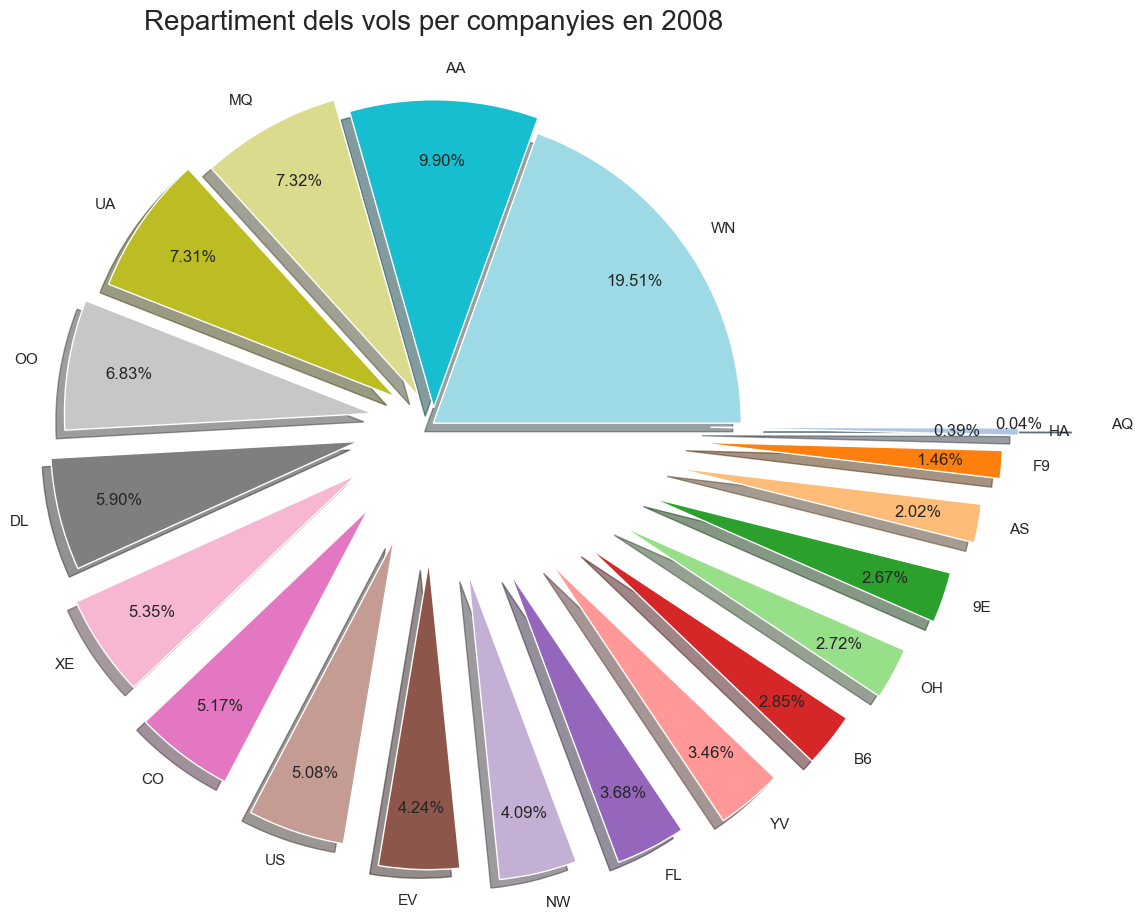

In [130]:
df_pie = df.UniqueCarrier.value_counts(normalize = True)

labels = df_pie.index
sizes = df_pie

# Explode
myexplode = [0] * len(df_pie.index)

for item in range(len(myexplode)):
    myexplode[item] = myexplode[item]+(item/20)
    
# l'´´ultim valor queda molt enganxat, així que cal augmenta una mica la separació    
myexplode[-1:] = [1.1]

# Colors
my_cmap = plt.get_cmap('tab20')
# my_cmap = plt.get_cmap('Pastel1_r')
colors = my_cmap(np.linspace(1,0,20))

fig1, ax = plt.subplots(figsize=(16, 10))
ax.pie(sizes, 
       labels = labels, # etiquetes 
       autopct = '%1.2f%%', # format del nombre
       # wedgeprops = {'edgecolor':'white'}, # separació entre sectors
       labeldistance = 1.1, # distància dels noms
       pctdistance = 0.8, # distància dels nombres
       colors = colors,
       explode = myexplode, 
       startangle = 0,
       counterclock = True,
       shadow = True,
       # textprops={'color':"w"}
      )


ax.set_title('Repartiment dels vols per companyies en 2008', fontsize=20)

# Es important fer l'exportació abans de mostrar la imatge !! 
plt.savefig('01_Repartiment_de_vols_per_aerolinies.png', dpi=120)

plt.show()



del df_pie

### <span style="color:blue; font-style:italic">Quines companyies realitzen més vols?</span>

<span style="color:blue">
<p>La representació visual d'una variable categòrica es pot realitzar bàsicament de dues maneres: amb un diagrama "de pastís" o amb un gràfic de barres, ja que el que farem és comptar aparicions d'elements.</p>

<p>El diagrama circular el que fa és mostrar les relacions de les parts amb el total. Per això és neutre respecte la jerarquia. Depenent del cas es decidirà si informar en percentatges o per quantitats(com es fa quan s'informa de la representació en diputats per partits quan hi ha eleccions, per exemple). </p>
   
<p>L'inconvenient que té és que està limitat a una quantitat relativament petita d'elements, ja que en cas contari es dificulta la lectura. Segurament les 20 aerolínies del nostre dataframe estan en el límit del que es pot considerar acceptable.</p>
</span>

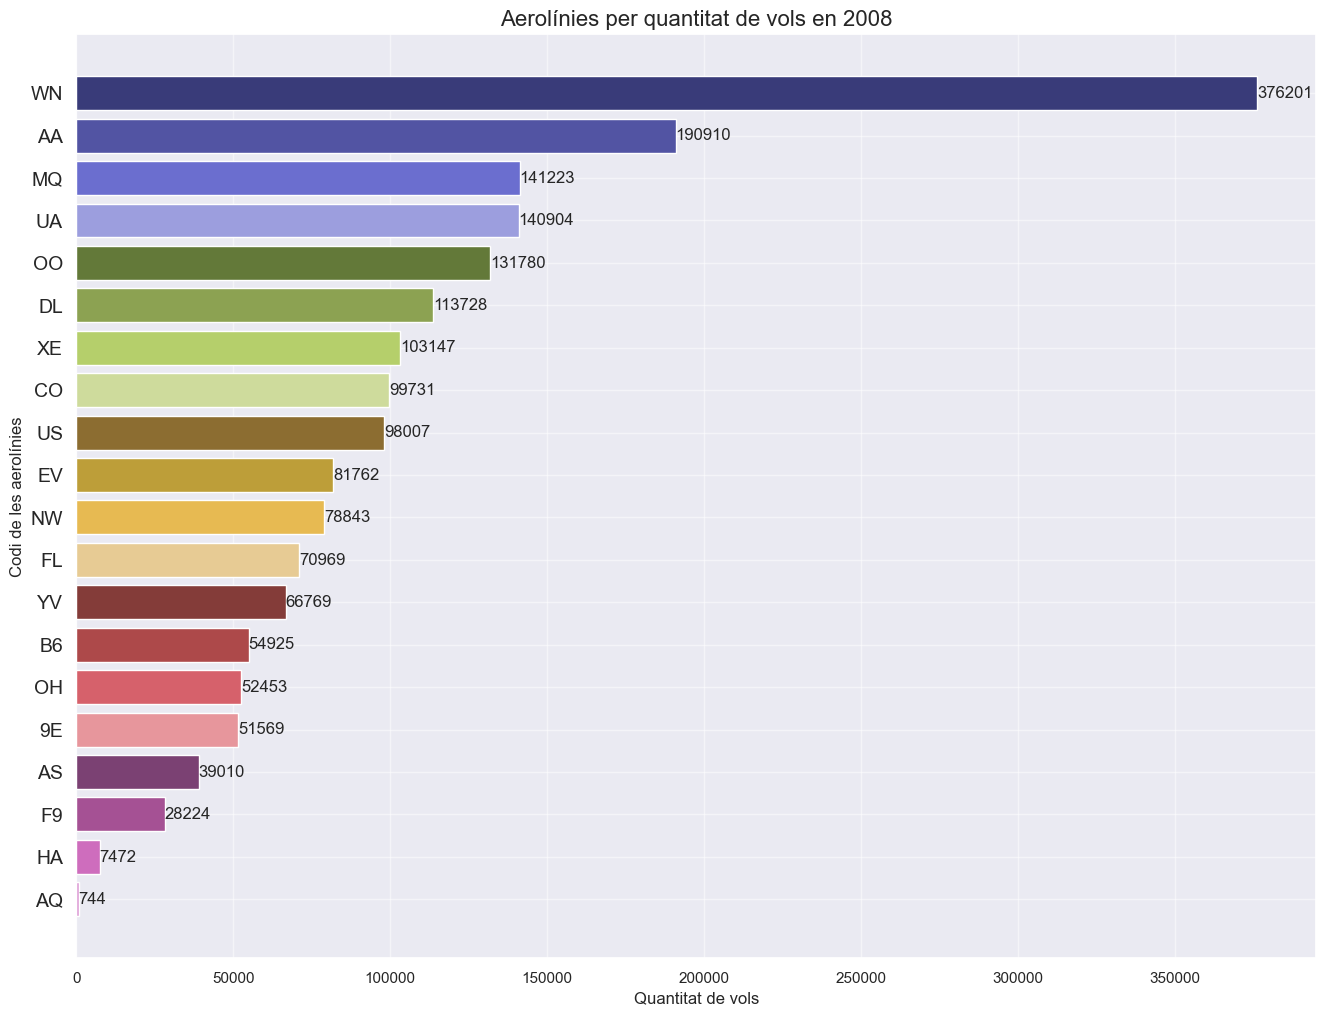

In [131]:
newDF = df.UniqueCarrier.value_counts().sort_values(ascending = True)

fig1, ax = plt.subplots(figsize=(16, 12))

# colors
# my_cmap = plt.get_cmap('plasma')
my_cmap = plt.get_cmap('tab20b')
colors = my_cmap(np.linspace(1,0,20))

barres = ax.barh(newDF.index, newDF, color=colors )
for bar in barres:
  width = bar.get_width() #Previously we got the height
  label_y_pos = bar.get_y() + bar.get_height() / 2
  ax.text(width, label_y_pos, s=f'{width}', va='center')
for tick in ax.yaxis.get_major_ticks():
  tick.label.set_fontsize(14)

plt.grid(True, alpha=.5)
plt.title('Aerolínies per quantitat de vols en 2008', fontsize=16)
plt.xlabel("Quantitat de vols")
plt.ylabel("Codi de les aerolínies")

plt.savefig('02_Repartiment de vols per aerolinies.png', dpi=120)
plt.show()

<span style="color:blue">
<p>El gràfic de barres pot donar una visió jerarquitzada de les relacions entre les parts, especialment si les dades apareixen ordenades per aquest criteri i no per ordre alfabètic, per exemple. Això pot ser tant un avantatge o un inconvenient, depenent de la intenció que es vulgui de la imatge resultant. En el cas de les aerolínies fa destacar clarament el paper de 'lideratge' de WN molt per sobre les altres.</p>

<p>El possible mostrar molts més elements amb eficàcia que en el diagrama circular, i també triant quants i quins valors es poden mostrar. El conjunt del que es representa no té per què representar el total, ni inclús quan s'indiquen explícitament els percentatges.</p>
</span>

In [132]:
# Per a veure els estils accesibles a Matplotlib
# plt.style.available

### Una variable numèrica (ArrDelay)

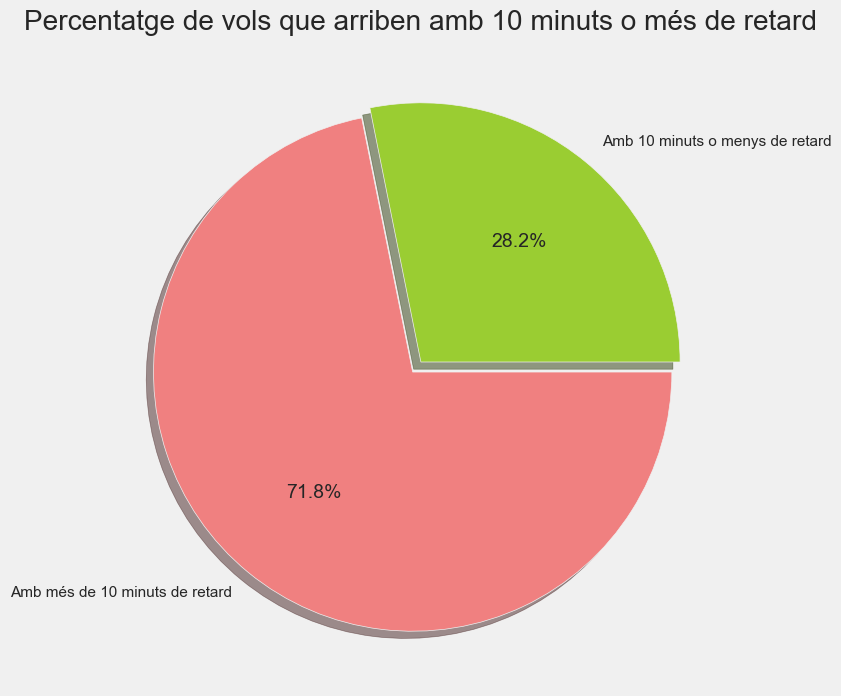

In [133]:
retard_acceptable = 10
num_vols_sense_retard = df.where(df.ArrDelay <= retard_acceptable).count()[0]
num_vols_amb_retard = df.where(df.ArrDelay > retard_acceptable).count()[0]

plt.style.use('fivethirtyeight')

fig1, ax = plt.subplots(figsize=(12, 8))

labels = [f'Amb {retard_acceptable} minuts o menys de retard', f'Amb més de {retard_acceptable} minuts de retard']
sizes = [num_vols_sense_retard, num_vols_amb_retard]
explode = [0, 0.05]

ax.pie(sizes, 
       labels=labels, 
       autopct='%1.1f%%', 
       explode = explode, 
       colors = ['yellowgreen', 'lightcoral'],
       shadow = True,)

ax.set_title(f'Percentatge de vols que arriben amb {retard_acceptable} minuts o més de retard')

plt.savefig('03_Percentatge de vols amb 10 m de retard.png', dpi=120)
plt.show()



### <span style="color:blue; font-style:italic">Quina probabilitat hi ha que un vol arribi amb 10 minuts de retard (acceptable?) o menys?</span>

<span style="color:blue">
<p>El gràfic circular és molt eficaç visualment pel casos que la informació es transmet amb pocs elements, com poden ser les respostes binàries.</p>

<p>És aquest el cas, ja que només hi ha dues possibilitats, o el vol arriba amb 10 minuts d'endarriment o menys, o arriba més tard.</p>
    

</span>

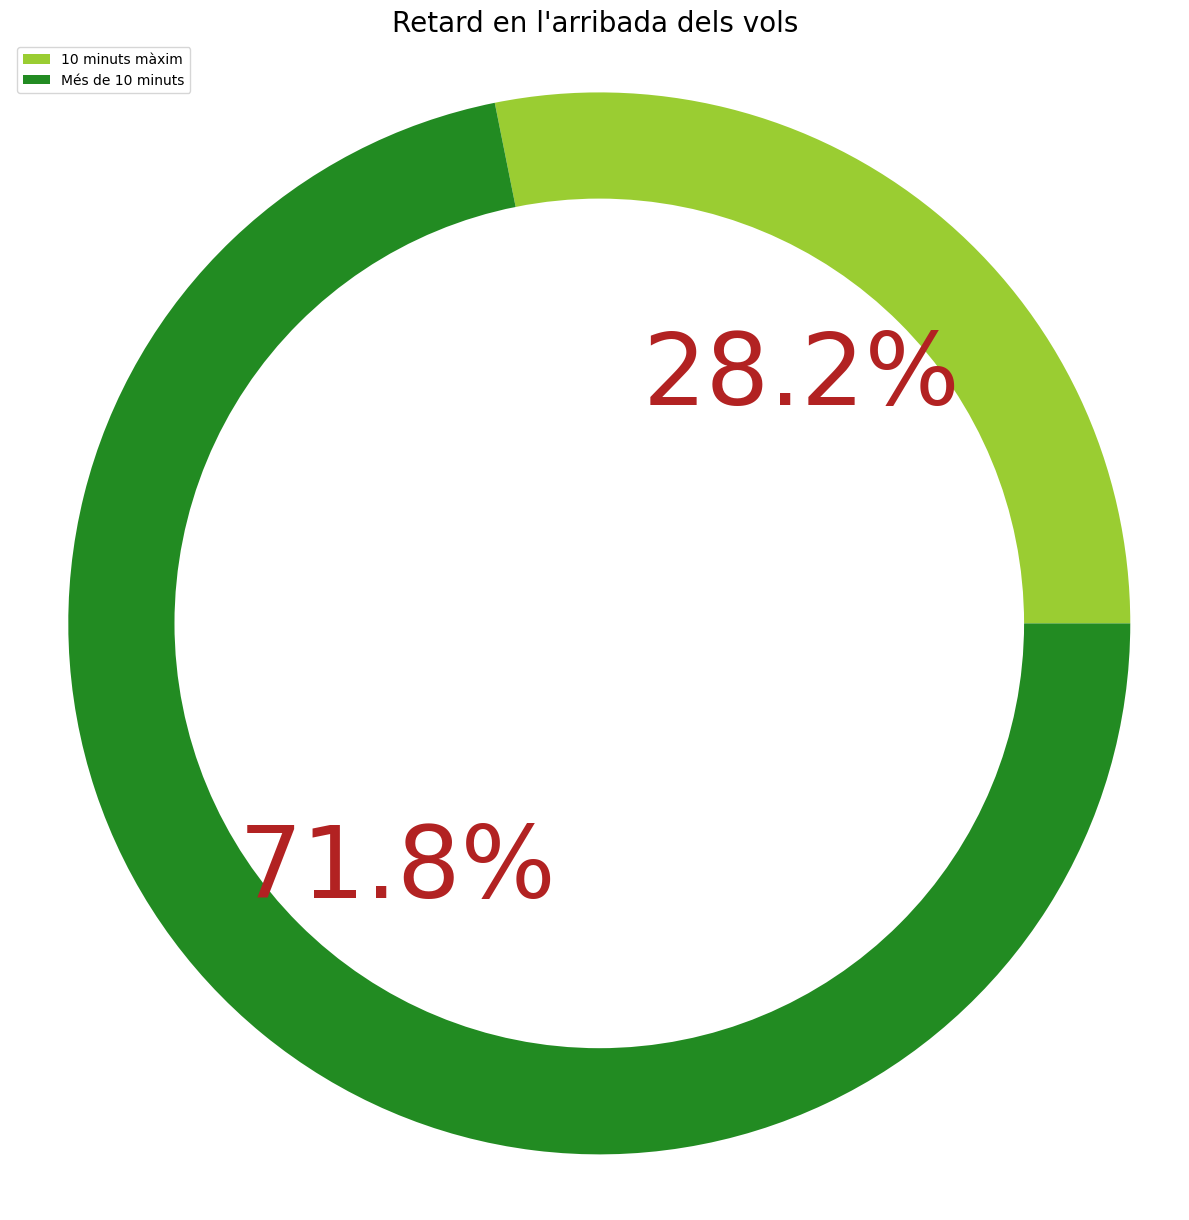

In [134]:
# retard_acceptable = 10
# num_vols_sense_retard = df.where(df.ArrDelay <= retard_acceptable).count()[0]
# num_vols_amb_retard = df.where(df.ArrDelay > retard_acceptable).count()[0]

plt.style.use('default')

fig1, ax = plt.subplots(figsize=(12, 12))

labels = [f'{retard_acceptable} minuts màxim', f'Més de {retard_acceptable} minuts']
sizes = [num_vols_sense_retard, num_vols_amb_retard]


ax.pie(sizes, 
       # labels=labels, 
       autopct='%1.1f%%', 
       colors = ['yellowgreen', 'ForestGreen'],
       textprops={'fontsize': 72, 'color':'FireBrick'}
       )


#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()

ax.set_title(f'Retard en l\'arribada dels vols', fontsize=20)
plt.legend(labels)

plt.savefig('04_Percentatge de vols amb 10 m de retard.png', dpi=120)

plt.show();



<span style="color:blue">
<p>La representació 'clàssica' del diagrama circular és per sectors, però hi ha alternatives que val la pena explorar perquè poden ser més potents visualment. </p>
  

</span>

### Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

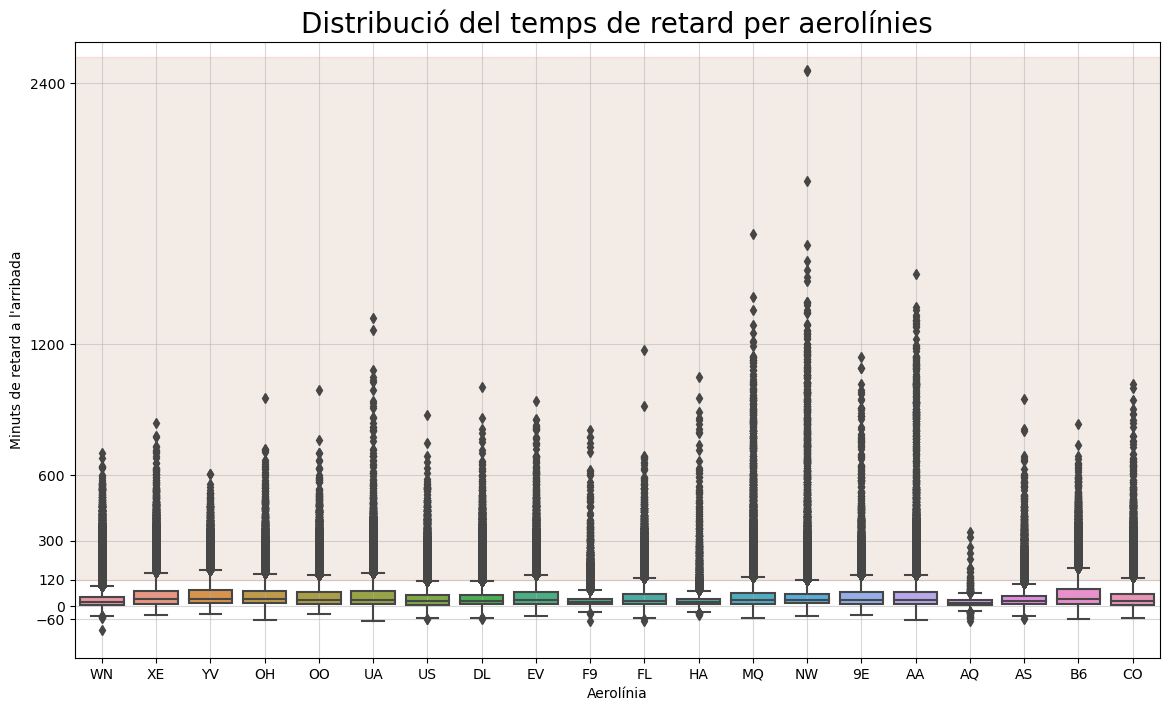

In [135]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(14, 8))


sns.boxplot(x = df.UniqueCarrier, y = df.ArrDelay, data = df)
plt.xlabel("Aerolínia")
plt.ylabel("Minuts de retard a l'arribada")
plt.grid(alpha=0.5)
plt.yticks([-60,0,120, 300, 600, 1200, 2400])
rect = Rectangle((-5,120), 500, 2400, alpha=0.1, facecolor='SaddleBrown', edgecolor='red', linewidth=1)
ax.add_patch(rect)


plt.title("Distribució del temps de retard per aerolínies", fontsize=20)
plt.savefig('05_Temps de retard per aerolínies.png', dpi=120)
plt.show()



### <span style="color:blue; font-style:italic">És uniforme la distribució dels endarreriments a l'arribada per aerolínies?</span>

<span style="color:blue"><p>
Els gràfics de caixes i de violí són adequats per a respondre a aquesta pregunta, ja que mostren clarament com es distribueixen les dades. 
</p></span>
<span style="color:blue"><p>
Com era d'esperar, per les característiques del dataframe, la resposta és NO. Ni per cada companyia ni comparativament entre elles. Hi ha molts valors extrems, especialment pel que correspon als retards més grans. De fet, l'àrea ombrejada correspon només al 7.9% del total dels vols.
</span>
<span style="color:blue"><p>
De tota manera el gràfic es resenteix per l'excesiva quantitat dels elements a visualitzar. Per solventar el problema hi ha dues estratègies: mostrar només el detall més significatiu (com un zoom) i/o acotar la representació a menys elements. Seguidament veurem ambdós.
</span>

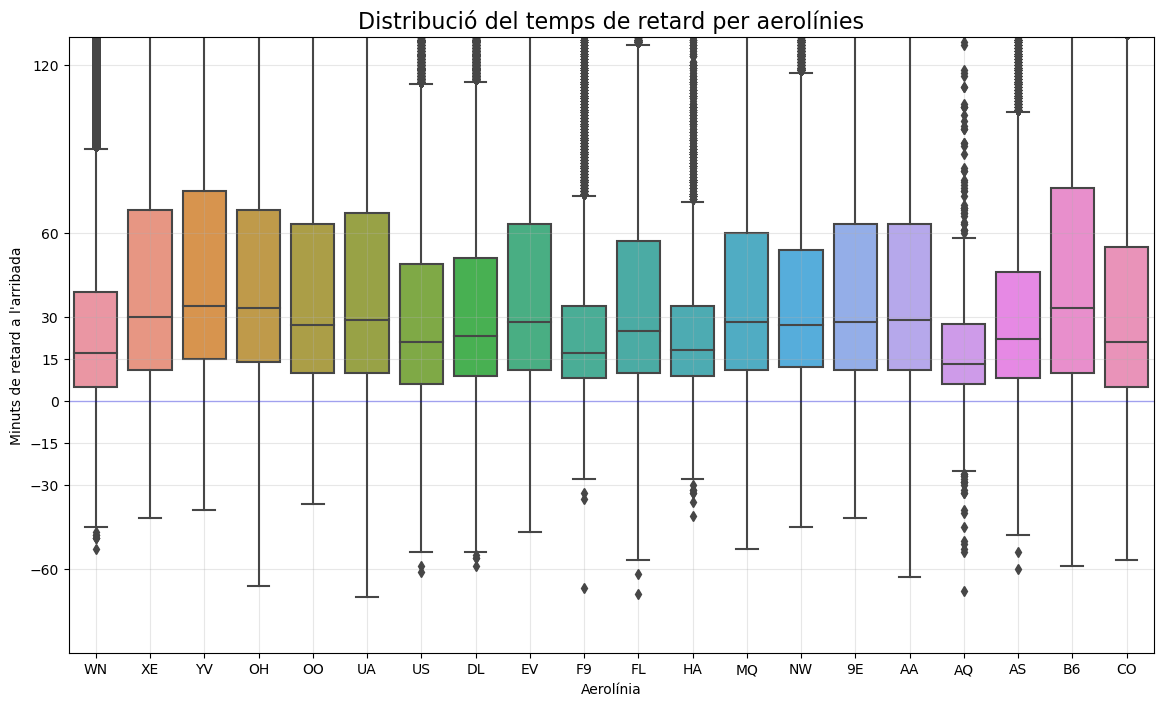

In [136]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.boxplot(x = df.UniqueCarrier, y = df.ArrDelay, data = df)
plt.xlabel("Aerolínia")
plt.ylabel("Minuts de retard a l'arribada")
plt.yticks([-60,-30, -15, 0, 15, 30, 60, 120])
ymin = -90
ymax = 130
plt.ylim(ymin, ymax)
plt.axhline(0, color='blue', linewidth=1, alpha=0.3) # línia horitzontal
plt.title("Distribució del temps de retard per aerolínies", fontsize=16)
plt.grid(alpha=0.3)
plt.savefig('06_Temps de retard per aerolínies (detall).png', dpi=120)

plt.show()



### <span style="color:blue; font-style:italic">Quines són les millors i pitjors aerolínies considerant l'endarreriment a l'arribada?</span>

<span style="color:blue"><p>
En aquest gràfic la línia del zero indica la puntualitat estricta. Per sota apareixen els vols que arriben abans d'hora, que són molts menys que el que arriben tard, com ja hem vist. Per tant, és millor quan més a prop estan les caixes de la línia i quan més curtes són (menys retard en el tram interquartil). I encara una forma més senzilla de veure-ho és per la proximitat de la línia de la mitjana de cada caixa a la línia del zero.  
</p></span>

<span style="color:blue"><p>
Així que la resposta a la pregunta és que les tres millors són AQ, WN i F9, i les tres pitjors YV, B6 i OH. HA està molt penalitzada pels outliers, com es veu al gràfic anterior.
</p></span>

In [137]:
# Filtrar el dataframe
df_boxplot = df[df.UniqueCarrier.isin(['YV', 'AQ'])]


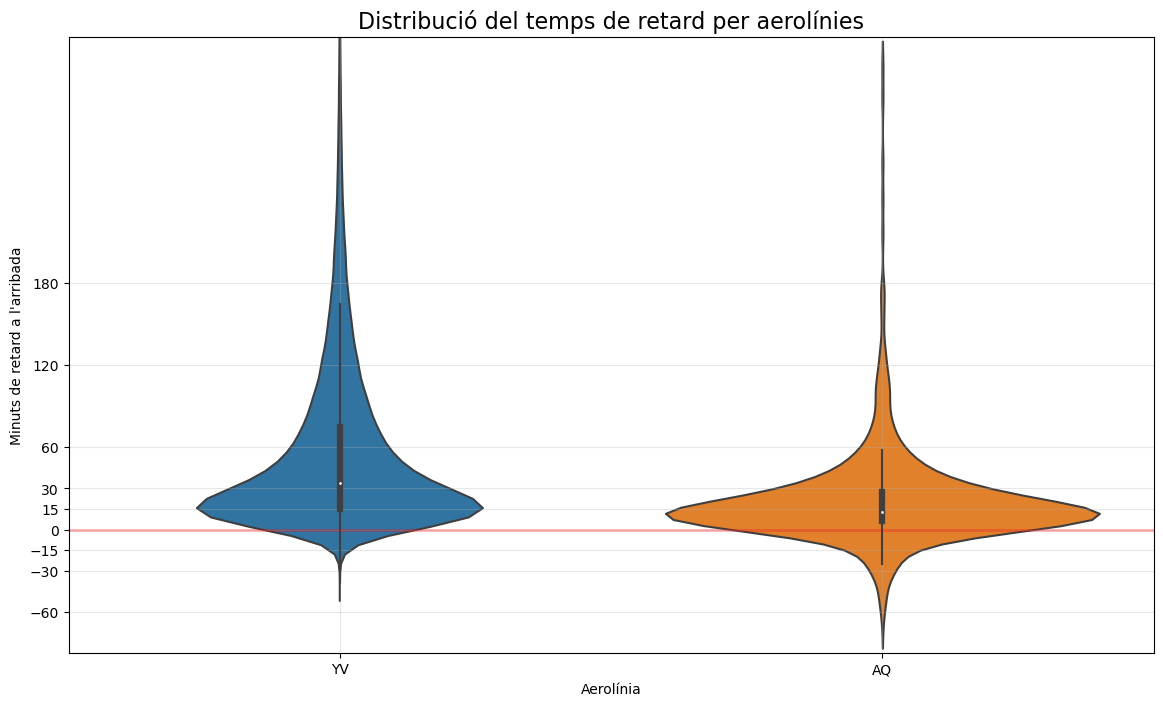

In [138]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.violinplot(x = df_boxplot.UniqueCarrier, y = df_boxplot.ArrDelay, data = df)
plt.xlabel("Aerolínia")
plt.ylabel("Minuts de retard a l'arribada")

ymin = -90
ymax = 360
plt.ylim(ymin, ymax)
plt.yticks([-60,-30, -15, 0, 15, 30, 60, 120, 180])
plt.grid(alpha=0.3)
plt.axhline(0, color='red', linewidth=2, alpha=0.3) # línia horitzontal
plt.title("Distribució del temps de retard per aerolínies", fontsize=16)
plt.savefig('07_Comparació entre les aerolínies YV i AQ (violí).png', dpi=120)

plt.show()



### <span style="color:blue; font-style:italic">Comparació de la pitjor i la millor companyia (YV i AQ respectivament</span>

<span style="color:blue"><p>
El gràfic de violí, com el de caixes, no representa quantitats, sinó la distribució estadística dels valors. De fet, al contrari del que està dibujat, la companyia AQ és força més petita que YV. 
</p></span>
<span style="color:blue"><p>
En el que ens de fixar és la posició del punt blanc per una banda (indica la mitjana, millor quan més abaix), i per una altra la forma del propi del violí (quan més ampli i baix més casos de reduit retard). Així mateix, la aerolínia AQ aconsegueix tenir més vols que arriben anticipadament (mostrat en la cua inferior), fet que normalment els usuaris consideren positiu.
</p></span>

### Dues variables numèriques (ArrDelay i DepDelay)

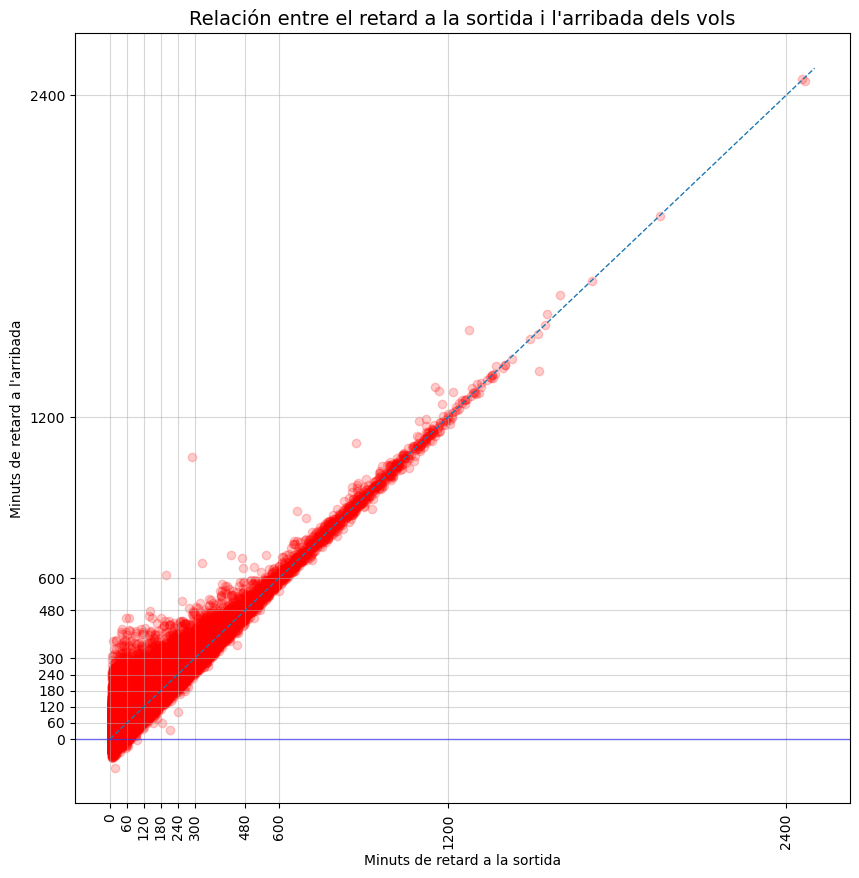

In [139]:
fig, ax = plt.subplots(figsize=(10, 10)) 
plt.scatter(df.DepDelay, 
            df.ArrDelay, 
            color='red', 
            alpha = 0.2)
x = [0, 2500]
y = [0, 2500]
plt.plot(x, y, linewidth=1, linestyle = "dashed") # Línia a 45 graus
plt.grid(True, alpha=.5)
plt.xlabel("Minuts de retard a la sortida")
plt.ylabel("Minuts de retard a l'arribada")
plt.xticks([0,60,120,180,240,300,480,600,1200,2400], rotation=90) # valors a mostrar en l'eix x
plt.yticks([0,60,120,180,240,300,480,600,1200,2400]) # valors a mostrar en l'eix y
plt.axhline(0, color='blue', linewidth=1, alpha=0.5) # línia horitzontal
plt.title("Relación entre el retard a la sortida i l'arribada dels vols", fontsize=14)

plt.savefig("08_Relació entre el retards de sortida i d'arribada.png", dpi=120)
plt.show()



### <span style="color:blue; font-style:italic">Hi ha relació entre el retard a la sortida i el retard a l'arribada, a nivell general?</span>

<span style="color:blue"><p>
La marcadíssima tendència a seguir la línia discontínua a 45 graus mostra que la resposta és un rotund SÍ, encara que també podem veure com molts vols amb retard importants a la sortida aconsegueixen finalment recuperar el temps perdut, inclús completament. També apareixen els vols que arriben abans del previst, per sota la línia continua que segueix el zero. 
</p></span>
<span style="color:blue"><p>
Destacar finalment que no hi ha cap vol que amb endarreriment negatiu a la sortida, és a dir amb sortida abans d'hora. Això era d'esperar, ja que díficilment es pot preveure per l'operativa del aeroports que una avió comercial despegui abans de la seva programació estipulada, inclús si ja ha omplert tot el passatge. El cas contrari és diferent, ja que si es pot sempre serà millor (per seguretat) que les naus aterrin quan abans.
</p></span>

### Tres variables (ArrDelay, DepDelay i UniqueCarrier)

In [140]:
# Còpia de les dades
df_violi_sor = df[['UniqueCarrier', 'DepDelay']].copy()
# Canviar nom a columna que serà l'eix y
df_violi_sor.rename(columns={'DepDelay': 'Retard'}, inplace = True)
# Crear un nou camp per al tipus d'endarreriment
df_violi_sor['Quan'] = 'Sortida'

df_violi_arr = df[['UniqueCarrier', 'ArrDelay']].copy()
df_violi_arr.rename(columns={'ArrDelay': 'Retard'}, inplace = True)
df_violi_arr['Quan'] = 'Arribada'

# Unificar
df_violi_total = pd.concat([df_violi_sor, df_violi_arr ])

# Limitar el dataframe a dues aerolínies
df_violi = df_violi_total[df_violi_total.UniqueCarrier.isin(['AQ', 'YV'])] 

# Eliminar els DF auxiliars per estarvial memòria
del df_violi_sor, df_violi_arr, df_violi_total

                                                      

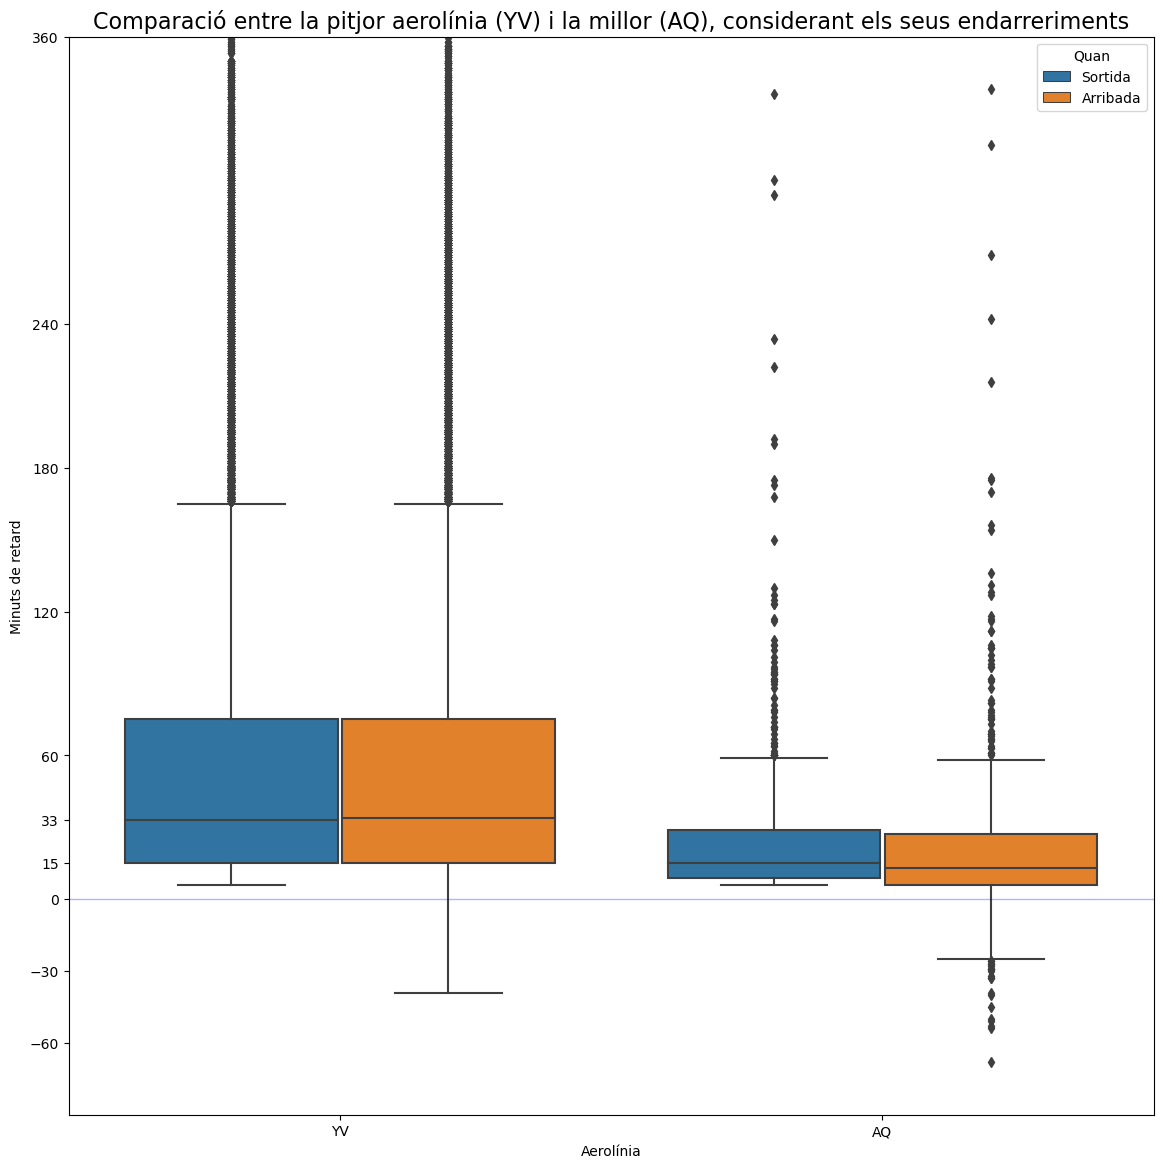

In [141]:
fig, ax = plt.subplots(figsize=(14, 14))

sns.boxplot(x = df_violi.UniqueCarrier, 
            y = df_violi.Retard , 
            hue = df_violi.Quan,        
           )

plt.xlabel("Aerolínia")
plt.ylabel("Minuts de retard")

ymin = -90
ymax = 360
plt.ylim(ymin, ymax)
plt.axhline(0, color='blue', linewidth=1, alpha=0.3) # línia horitzontal
plt.yticks([-60,-30,0,15,33,60,120,180,240,360])
plt.title("Comparació entre la pitjor aerolínia (YV) i la millor (AQ), considerant els seus endarreriments", fontsize=16)


plt.savefig('09__Comparació entre les aerolínies YV i AQ (caixes).png', dpi=120)

plt.show()


### <span style="color:blue; font-style:italic">Hi ha relació entre el retard a la sortida i el retard a l'arribada, segons la companyia aèria?</span>

<span style="color:blue"><p>
Ja sabem per l'scatterplot que hi ha una acusada tendència a arrossegar el retard de sortida amb l'arribada. Tanmateix el gràfic de caixes anterior també ens ha mostrat que això no succeiex en totes les aerolínies de la mateixa manera. 
</p></span>
<span style="color:blue"><p>
En aquesta vista de detall, en la qual tornem a comparar la pitjor i la millor companyia, veiem com la caixa de l'arribada de l'aerolínia AQ està lleugerament per sota de la de sortida, senyal que es recupera temps. Igualment, la distància entre les Ts està en la part baixa, tot el contrari que en YV, que les caixes estan més amunt són més altes(amb més retard).
</p></span>

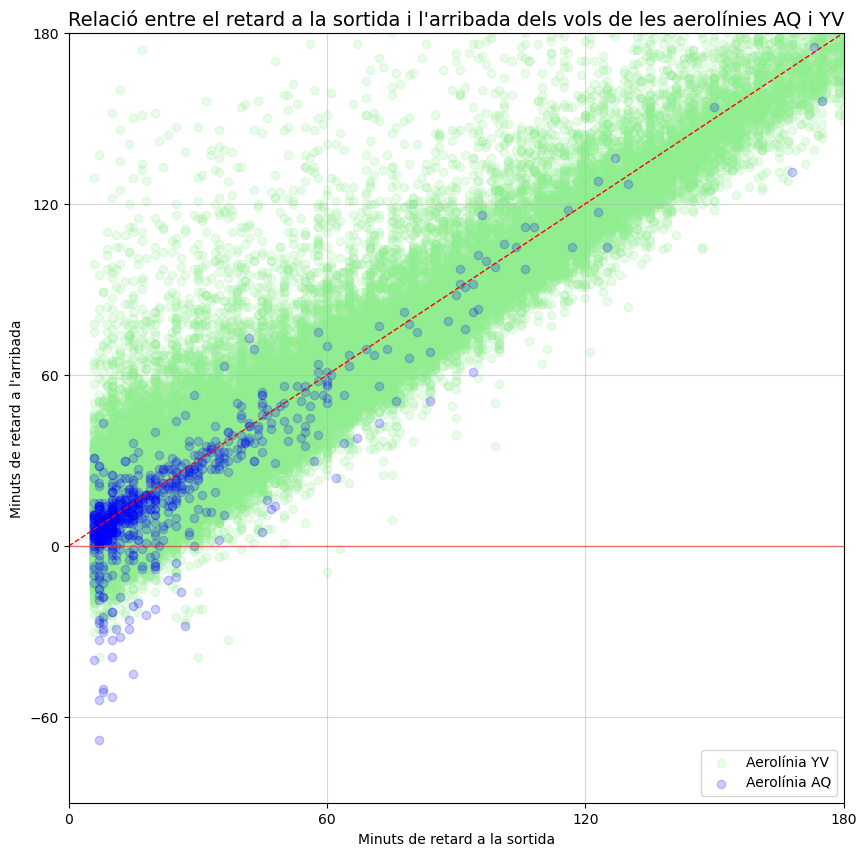

In [142]:
df_AQ = df[df.UniqueCarrier.isin(['AQ'])]
df_YV = df[df.UniqueCarrier.isin(['YV'])]

fig, ax = plt.subplots(figsize=(10, 10)) 

plt.scatter(df_YV.DepDelay, 
            df_YV.ArrDelay, 
            c='LightGreen', 
            alpha = 0.2,
            label = 'Aerolínia YV'
           )

plt.scatter(df_AQ.DepDelay, 
            df_AQ.ArrDelay, 
            c='Blue', 
            alpha = 0.2,
            label = 'Aerolínia AQ'
           )

x = [0, 2500]
y = [0, 2500]
plt.plot(x, y, linewidth=1, linestyle = "dashed", color='red')
plt.grid(True, alpha=.5)
plt.xlabel("Minuts de retard a la sortida")
plt.ylabel("Minuts de retard a l'arribada")
plt.xticks([0,60,120,180,240,300,480,600])
plt.yticks([-60,0,60,120,180,240,300,480,600])
plt.xlim(0, 180)
plt.ylim(-90, 180)
plt.axhline(0, color='red', linewidth=1, alpha=0.5) # línia horitzontal
plt.title("Relació entre el retard a la sortida i l'arribada dels vols de les aerolínies AQ i YV", fontsize=14)
plt.legend(loc=4)
plt.savefig('10__Comparació entre les aerolínies YV i AQ (scatterplot).png', dpi=120)

plt.show()



<span style="color:blue"><p>
Aquest scatterplot de detall, amb les mateixes companyies, mostra per acumulació de casos el que haviem abans : AQ té relativament molts més vols per sota la diagonal discontínua (es recupera temps), inclús per sota del zero (l'arribada real s'avança a la previsió). A diferència del gràfic de caixes, aquí sí que veiem com la companyia YV realiza molt més vols que AQ, però també que la majoria arriben tard o molt tard. 
</p></span>


### Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier). 

In [143]:
newDF_4camps = df[['UniqueCarrier', 'ArrDelay', 'DepDelay', 'AirTime']]

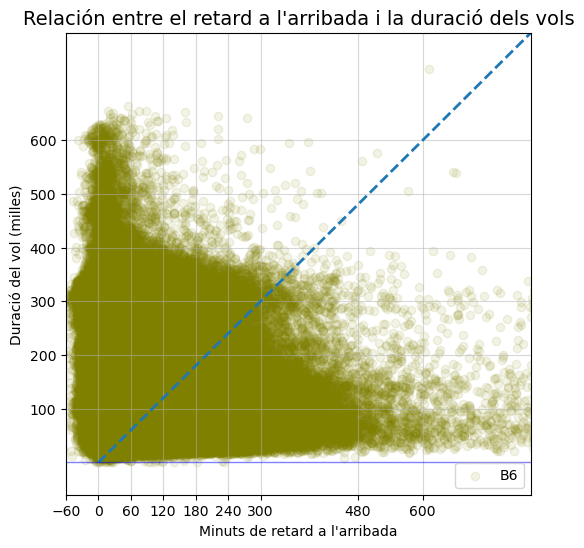

In [144]:
fig, ax = plt.subplots(figsize=(6, 6)) 
plt.scatter(newDF_4camps.ArrDelay, 
            newDF_4camps.AirTime, 
            c='Olive', 
            alpha = 0.1,
            label = 'B6'
           )

x = [0, 800]
y = [0, 800]
plt.plot(x, y, linewidth=2, linestyle = "dashed")
plt.grid(True, alpha=.5)
plt.xlabel("Minuts de retard a l'arribada")
plt.ylabel("Duració del vol (milles)")
plt.xticks([-60,0,60,120,180,240,300,480,600])
plt.yticks([100, 200, 300, 400, 500, 600])
plt.xlim(-60, 800)
plt.ylim(-60, 800)
plt.axhline(0, color='blue', linewidth=1, alpha=0.5) # línia horitzontal
plt.title("Relación entre el retard a l'arribada i la duració dels vols", fontsize=14)
plt.legend(loc=4)
plt.show()

### <span style="color:blue; font-style:italic">Hi ha relació entre el retard a l'arribada o la sortida amb la duració del vols, per cada aerolínia?</span>

<span style="color:blue"><p>
Abans de començar amb el gràfic que sintetitzi les quatre variables, com deman l'exercici, cal una prospecció prèvia. En aquest sentit el gràfic és inapelable. NO hi ha relació. Malgrat compartir unitats de mesura (en minuts) no té res a veure la duració d'un vols amb si arriba tard o no. El mateix podem dir respecte al retard a la sortida, pel que s'ha vist abans.
</p></span>
<span style="color:blue"><p>
Així doncs, quin tipus de gràfic utilitzar?
</p></span>

In [145]:
newDF = df[['UniqueCarrier', 'ArrDelay', 'DepDelay']].groupby('UniqueCarrier').median()
newDF['Vols'] = df.UniqueCarrier.value_counts()
newDF['AirTime_min'] = df[['UniqueCarrier', 'AirTime']].groupby('UniqueCarrier').sum()
newDF['AirTime_hour'] = newDF['AirTime_min']/60
newDF = newDF.sort_values(by = 'AirTime_min')
# newDF

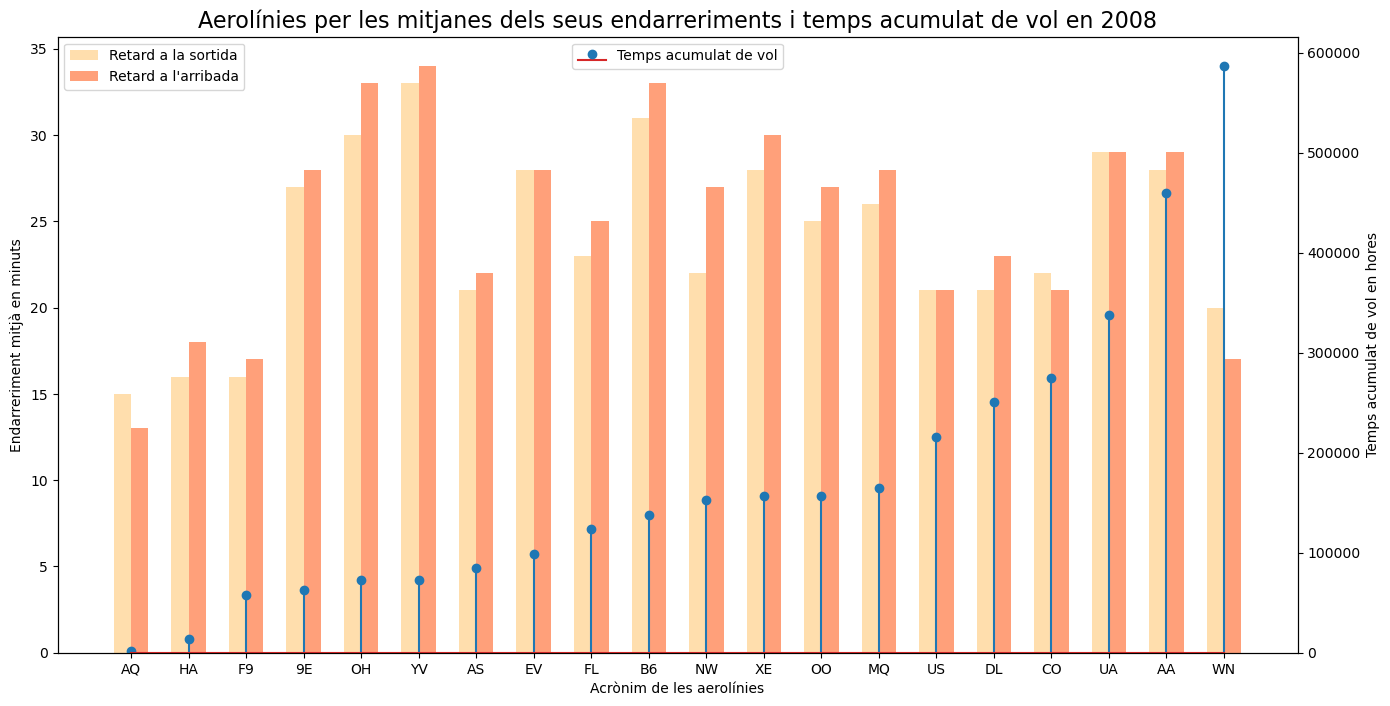

In [146]:
fig, ax = plt.subplots(figsize=(16, 8))

# Set position of bar on X axis
quantitat_de_grups = len(newDF)
index_barres = np.arange(quantitat_de_grups)
ample_barra = 0.3


plt.bar(index_barres, newDF.DepDelay, width=ample_barra, label="Retard a la sortida", color="NavajoWhite")
plt.bar(index_barres+ample_barra, newDF.ArrDelay, width=ample_barra, label="Retard a l'arribada", color="LightSalmon")

plt.title('Aerolínies per les mitjanes dels seus endarreriments i temps acumulat de vol en 2008', fontsize=16)
plt.xticks(index_barres+(ample_barra/2), newDF.index)
plt.ylabel("Endarreriment mitjà en minuts")
plt.xlabel("Acrònim de les aerolínies")
plt.legend(loc=2)
ax2 = ax.twinx()
ax2.stem(index_barres+(ample_barra/2), newDF.AirTime_hour, label="Temps acumulat de vol")
ax2.set_ylabel("Temps acumulat de vol en hores")
ax2.set_ylim(0)
ax2.legend(loc=9)
plt.savefig('11__endarreriments i temps de vol.png', dpi=120)

plt.show()



<span style="color:blue"><p>
Descartat el ridgeline, ja que simplement aprofita que els retards i la duració del vol estan en la mateixa unitat de mesura (els minuts), i per tant no aporta informació rellevant per a les variables a estudiar, m'he decidit per aquests gràfic compost. Per una banda tenim per cada companyia, a l'eix y de l'esquerra la representació de les mitjanes del seus retards, destacant AQ com la que té valors més baixos. Per una altra, a l'eix y de la dreta tenim l'escala de les hores acumulades de vol de cada aerolínia, en la que destaca WM com la empresa més potent.
</p></span>
<span style="color:blue"><p>
Es constata clarament que NO hi ha relació entre els endarriments i les hores de vol. WM és amb diferència la companyia amb més temps de vols i a l'hora de les que té retards (relativament) més baixos. Per a que això passés hauriem de veure que la corba de les hores de vols tindria una contrapartida amb una corba paral·lela en els endarreriments (més hores de vols implicaria més temps de retard), o bé una corba invertida (amb justament el contrari).
</p></span>


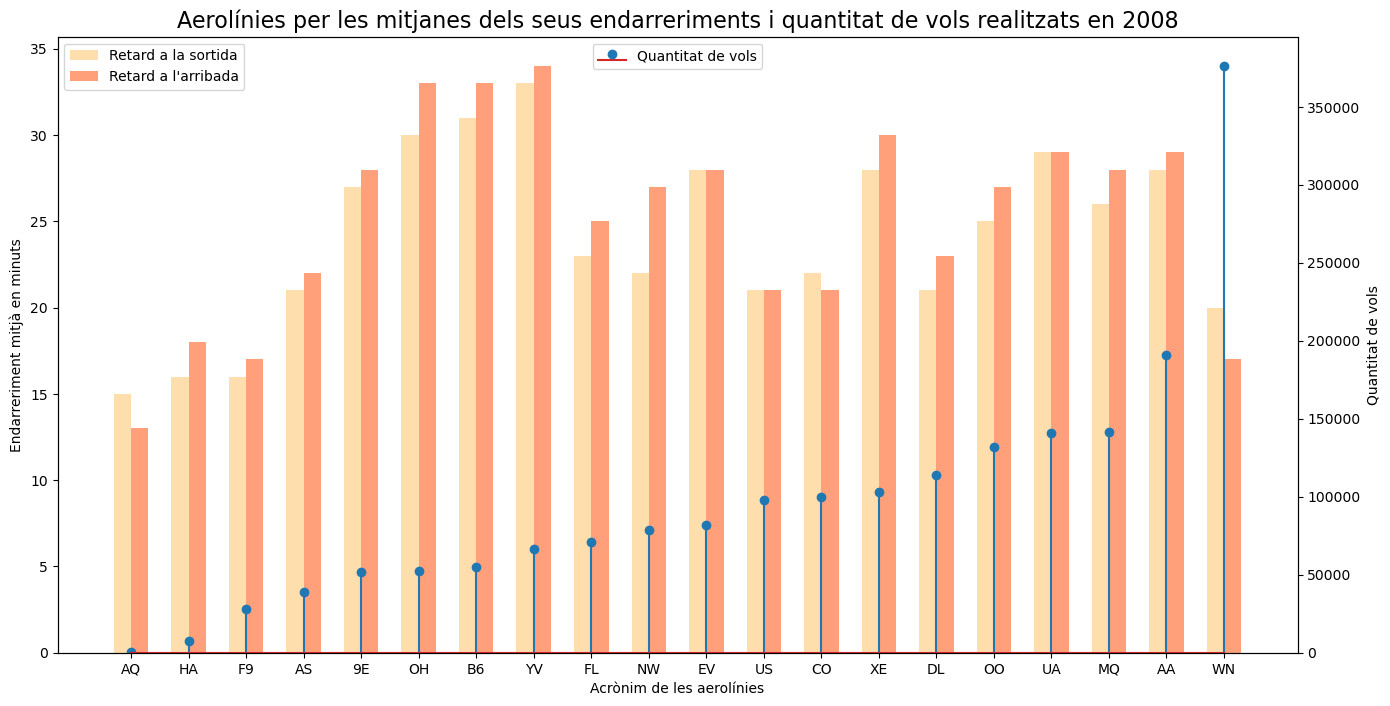

In [147]:
newDF = newDF.sort_values(by = 'Vols')

# Gràfic

fig, ax = plt.subplots(figsize=(16, 8))


# Set position of bar on X axis
quantitat_de_grups = len(newDF)
index_barres = np.arange(quantitat_de_grups)
ample_barra = 0.3


plt.bar(index_barres, newDF.DepDelay, width=ample_barra, label="Retard a la sortida", color="NavajoWhite")
plt.bar(index_barres+ample_barra, newDF.ArrDelay, width=ample_barra, label="Retard a l'arribada", color="LightSalmon")

plt.title('Aerolínies per les mitjanes dels seus endarreriments i quantitat de vols realitzats en 2008', fontsize=16)
plt.xticks(index_barres+(ample_barra/2), newDF.index)
plt.ylabel("Endarreriment mitjà en minuts")
plt.xlabel("Acrònim de les aerolínies")
plt.legend(loc=2)
ax2 = ax.twinx()
ax2.stem(index_barres+(ample_barra/2), newDF.Vols, label="Quantitat de vols")
ax2.set_ylabel("Quantitat de vols")
ax2.set_ylim(0)
ax2.legend(loc=9)

plt.savefig('12__endarreriments i quantitat de vols.png', dpi=120)
plt.show()



### <span style="color:blue; font-style:italic">Hi ha relació entre el retard a l'arribada o la sortida amb la quantitat de vols de cada aerolínia?</span>

<span style="color:blue"><p>
Ja posats, repetim el model de gràfic per a veure si el retards tenen relació amb la quantitat de vols. 
</p></span>
<span style="color:blue"><p>
Una altra vegada la resposta és clarament que NO. La distribució del endarreriments no segueix el rànking de les companyies més actives. 
</p></span>

# Exercici 2

Exporta els gràfics com imatges o com html.

# Exercici 3

Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.

In [148]:
df.nlargest(10, "ArrDelay", keep='all')

,UniqueCarrier,Month,ArrDelay,DepDelay,AirTime,Distance,FlightNum
322516,NW,2,2461.0,2457.0,437.0,3972,808
686014,NW,4,2453.0,2467.0,132.0,930,1699
839306,NW,5,1951.0,1952.0,145.0,1085,1107
1009553,MQ,6,1707.0,1710.0,50.0,304,3538
1881639,NW,12,1655.0,1597.0,192.0,1124,357
1497823,NW,9,1583.0,1552.0,75.0,282,512
685437,NW,4,1542.0,1545.0,63.0,449,1472
163379,AA,1,1525.0,1275.0,207.0,1811,2398
1214839,NW,7,1510.0,1518.0,160.0,1399,804
521096,NW,3,1490.0,1490.0,47.0,200,1743


In [149]:
df['FlightNum']= df['FlightNum'].astype(str)
df_vols = df[['UniqueCarrier', 'ArrDelay', 'FlightNum']].groupby(['FlightNum'], as_index= False)['ArrDelay'].median()
df_vols = df_vols.sort_values(by='ArrDelay', ascending = False)[:10]
df_vols = df_vols.sort_values(by='ArrDelay', ascending = True)

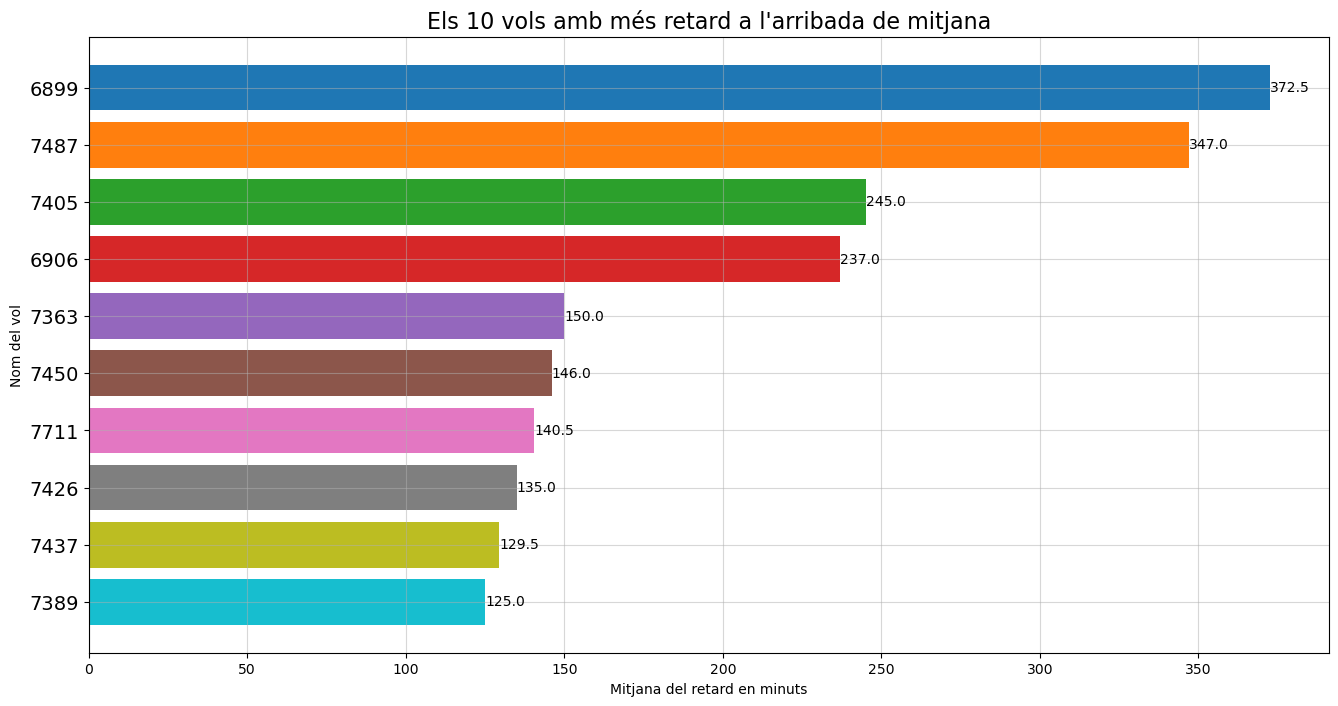

In [150]:
fig1, ax = plt.subplots(figsize=(16, 8))

# colors
# my_cmap = plt.get_cmap('plasma')
my_cmap = plt.get_cmap('tab10')
colors = my_cmap(np.linspace(1,0,10))

barres = ax.barh(df_vols.FlightNum, 
                 df_vols.ArrDelay,  
                 color=colors,
                                 
                )
for bar in barres:
  width = bar.get_width() #Previously we got the height
  label_y_pos = bar.get_y() + bar.get_height() / 2
  ax.text(width, label_y_pos, s=f'{width}', va='center')
for tick in ax.yaxis.get_major_ticks():
  tick.label.set_fontsize(14)

plt.grid(True, alpha=.5)
plt.title('Els 10 vols amb més retard a l\'arribada de mitjana', fontsize=16)
plt.xlabel("Mitjana del retard en minuts")
plt.ylabel("Nom del vol")

plt.savefig('13__els 10 vols més endarrerits.png', dpi=120)

plt.show()


### <span style="color:blue; font-style:italic"> Quins són els vols amb més retards a l'arribada de mitjana?</span>

<span style="color:blue"><p>
Com ja he indicat abans, el diagrama de barres és molt adequat per a mostrar rànkings, inclosos els negatius. Especialment les barres disposades horitzontalment, ja que seguixen el principi jeràrquic de posar al damunt el més destacable.  
</p></span>

In [151]:
newDF = df[['UniqueCarrier', 'ArrDelay', 'Month']].groupby(['UniqueCarrier', 'Month'], as_index= False)['ArrDelay'].median()
newDF.head()

,UniqueCarrier,Month,ArrDelay
0,9E,1,30.0
1,9E,2,33.0
2,9E,3,30.0
3,9E,4,27.0
4,9E,5,23.0


In [152]:
data = newDF.pivot("Month", "UniqueCarrier", "ArrDelay")
data

UniqueCarrier,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
Month,,,,,,,,,,,,,,,,,,,,
1,30.0,29.0,15.0,24.0,24.0,24.0,19.0,22.0,18.0,22.0,16.0,32.0,26.0,28.0,39.0,34.0,18.0,18.0,28.0,40.0
2,33.0,31.0,11.0,23.0,37.0,21.0,23.0,29.0,17.0,28.0,15.0,34.0,29.0,34.0,31.0,32.0,22.0,20.0,32.0,46.0
3,30.0,31.0,NaN,22.0,33.0,24.0,24.0,28.0,16.0,28.0,15.5,30.0,29.0,31.0,24.0,27.0,19.0,18.0,32.0,33.0
4,27.0,27.0,NaN,19.0,30.0,18.0,24.0,29.0,15.5,25.0,16.0,26.0,27.0,28.0,21.0,26.0,20.0,15.0,26.0,34.0
5,23.0,28.0,NaN,19.0,26.0,22.0,18.0,23.0,17.0,19.0,20.0,26.0,25.0,27.0,21.0,26.0,20.0,16.0,28.0,29.0
6,28.0,40.0,NaN,20.0,39.0,27.0,24.0,26.0,18.0,26.0,19.0,32.0,33.0,38.0,26.0,37.0,26.0,18.0,33.0,38.0
7,22.0,30.0,NaN,21.0,42.0,20.0,29.0,36.0,17.0,32.0,21.0,25.0,25.0,39.0,24.0,33.0,25.0,16.0,28.0,32.0
8,22.0,28.0,NaN,21.0,37.0,21.0,22.0,30.0,16.0,24.0,15.0,23.0,20.0,34.0,20.0,27.0,20.0,14.0,30.0,28.0
9,22.0,24.0,NaN,16.0,34.0,14.0,17.0,24.0,12.0,17.0,14.0,23.0,19.0,29.0,22.0,24.0,22.0,11.0,25.0,31.0


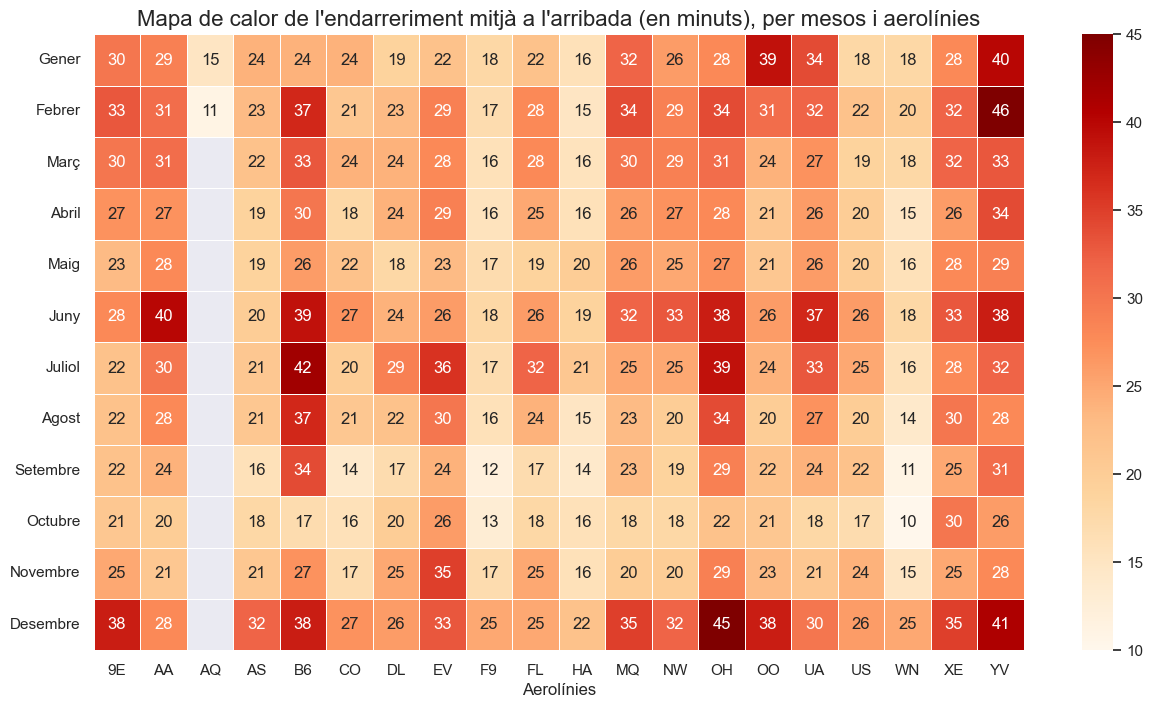

In [153]:
sns.set(rc={'figure.figsize': (15,8)})
mesos = ['Gener', 'Febrer', 'Març', 
         'Abril', 'Maig', 'Juny', 
         'Juliol', 'Agost', 'Setembre', 
         'Octubre', 'Novembre', 'Desembre']

heat_map = sns.heatmap(data = data, 
                       annot=True, # incloure els valors en cada rectangle
                       linewidths= 0.5, # gruix de la línia de separació
                       cmap="OrRd", # mapa de color
                       yticklabels=mesos, # etiquetes eix y
                       robust=True, # seaborn utilitza els valors entre 2 i 98 dels percentils, en compte del max i min
                       vmin=10, # valor mínim a l'escala de color
                       vmax=45, # valor màxim a l'escala de color
                      )

heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)

plt.ylabel('')
plt.xlabel('Aerolínies')
plt.title('Mapa de calor de l\'endarreriment mitjà a l\'arribada (en minuts), per mesos i aerolínies', fontsize=16)

plt.savefig('14__Mesos_vs_Aerolinies.png', dpi=120)

### <span style="color:blue; font-style:italic">Quina és la millor i la pitjor aerolína segons el mes, considerant el retard a l'arribada?</span>

<span style="color:blue"><p>
Aquest gràfic mostra amb una escala de colors la mitjana dels retards a l'arribada per mesos i aerolínies. D'aquesta manera, veiem que la millor companyia per a volar al febrer (al marge de l'origen i la destinació) és AQ i la pitjor YV. En canvi al desembre la millor és HA i la pitjor OH.  
</p></span>
<span style="color:blue"><p>
Els rectangles en gris són deguts a que no hi ha informació de vols durants aquests mesos de l'empresa AQ. 
</p></span>

# Enllaços d'interès

https://likegeeks.com/es/mapa-de-calor-de-seaborn/

https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap